In [1]:
# Section 1: Import Dependencies and Configure Environment
import os, time, math
os.environ['OMP_NUM_THREADS']='1'
os.environ['MKL_NUM_THREADS']='1'
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['VECLIB_MAXIMUM_THREADS']='1'
os.environ['NUMEXPR_NUM_THREADS']='1'
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from hamiltonian import Hamiltonian
from rgf import GreensFunction

print('Environment configured.')

Environment configured.


In [2]:
# Section 2: Instantiate one_d_wire Hamiltonian (non-periodic)
ham = Hamiltonian('one_d_wire', periodic=False)
print({'N': ham.N, 't': ham.t, 'o': ham.o, 'mu1': ham.mu1, 'mu2': ham.mu2, 'kbT_eV': ham.kbT_eV})

{'N': 150, 't': 1, 'o': 0, 'mu1': 0.0, 'mu2': 0.0, 'kbT_eV': 8.617333e-05}


In [3]:
# Section 3: Create Energy Grid and GreensFunction Instance
energy = np.linspace(-5,5,300)
try:
    gf = GreensFunction(ham, energy_grid=energy)
    print('GreensFunction energy_grid shape:', gf.energy_grid.shape)
except Exception as e:
    print('Failed to instantiate GreensFunction:', e)
    raise

GreensFunction energy_grid shape: (300,)


Boltzmann Poisson converged in 3 iterations.


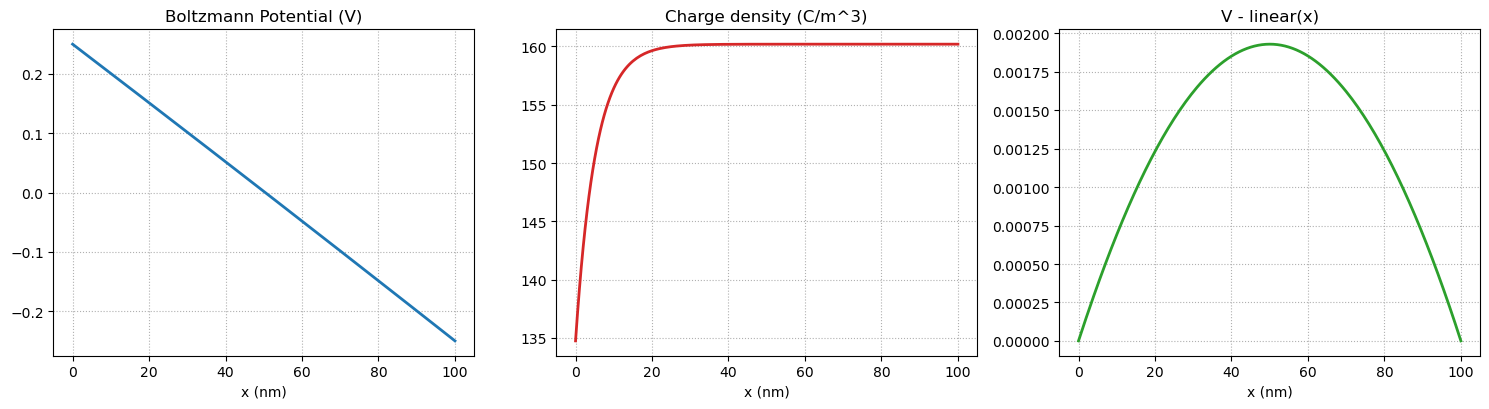

Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, interval, 1, gll_warped, unset, False, float64, []), (1,)), 0), Basix element (P, interval, 1, gll_warped, unset, False, float64, [])), 0)

In [4]:
from poisson_solver import solve_poisson_boltzmann, solve_poisson_negf

solve_poisson_boltzmann()

Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mo

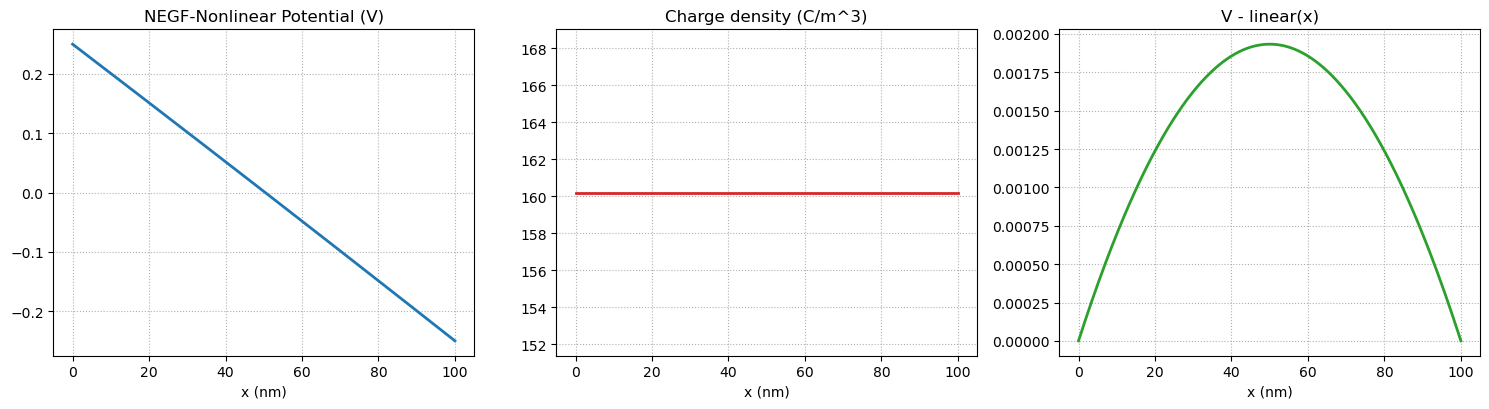

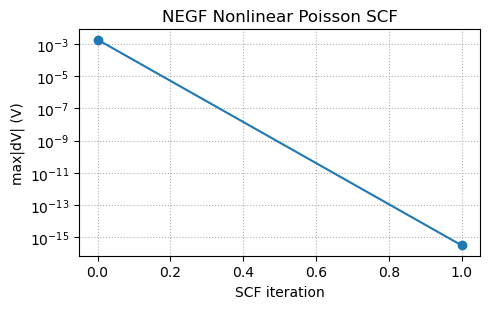

array([ 0.25      ,  0.24876928,  0.24753847,  0.24630756,  0.24507655,
        0.24384545,  0.24261424,  0.24138295,  0.24015155,  0.23892006,
        0.23768847,  0.23645679,  0.23522501,  0.23399313,  0.23276116,
        0.23152909,  0.23029692,  0.22906466,  0.22783229,  0.22659984,
        0.22536728,  0.22413463,  0.22290188,  0.22166904,  0.2204361 ,
        0.21920306,  0.21796993,  0.2167367 ,  0.21550337,  0.21426995,
        0.21303643,  0.21180281,  0.2105691 ,  0.20933528,  0.20810138,
        0.20686737,  0.20563327,  0.20439908,  0.20316478,  0.20193039,
        0.2006959 ,  0.19946132,  0.19822664,  0.19699186,  0.19575699,
        0.19452202,  0.19328695,  0.19205179,  0.19081653,  0.18958117,
        0.18834572,  0.18711017,  0.18587452,  0.18463878,  0.18340294,
        0.182167  ,  0.18093097,  0.17969484,  0.17845861,  0.17722228,
        0.17598586,  0.17474935,  0.17351273,  0.17227602,  0.17103922,
        0.16980231,  0.16856531,  0.16732822,  0.16609102,  0.16

In [5]:
from poisson_solver import solve_poisson_boltzmann, solve_poisson_negf
solve_poisson_negf(gf, ham)